<a href="https://colab.research.google.com/github/TbinhCodeNext/machineLearningClubTerm1/blob/main/Thanhbinh_ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Key to the Dataset**

*   Name: Name of cereal
*   mfr: Manufacturer of cereal
     *   A = American Home Food Products;
     *   G = General Mills
     *   K = Kelloggs
     *   N = Nabisco
     *   P = Post
     *   Q = Quaker Oats
     *   R = Ralston Purina
* Type:
    * cold
    * hot
* Calories: calories per serving
* Protein: grams of protein
* Fat: grams of fat
* Sodium: milligrams of sodium
* Fiber: grams of dietary fiber
* Carbo: grams of complex carbohydrates
* Sugars: grams of sugars
* Potass: milligrams of potassium
* Vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical 
* Percentage of FDA recommended
* Shelf: display shelf (1, 2, or 3, counting from the floor)
* Weight: weight in ounces of one serving
* Cups: number of cups in one serving
* Rating: a rating of the cereals (Possibly from Consumer Reports?)





Da Kaggle Set I am using is right ➡[HERE](https://www.kaggle.com/crawford/80-cereals)

**Loading Le Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# To read the csv file with pandas, I will use the varible df, so I can hold the dataset
df = pd.read_csv('cereal.csv')

# Then I'm going to go ahead and print this, since there's nothing in the parentheses it should be printing 5 of them 
df.head(77)



,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,One Hundred Percent Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,One Hundred Percent Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


**Le Features vs. Targets**

> * Features: Le inputs to le model "What is used to contribute the Rating" 


> * Targets: Le outputs to le model "Da prediction afterwards"


In [ ]:
feature_list = ["calories",	"protein",	"fat",	"sodium",	"fiber",	"carbo",	"sugars",	"potass",	"vitamins"]
print(feature_list)

['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']


In [ ]:
target_list = ["rating"]
print(target_list)

['rating']


In [ ]:
# Target variable is needed
targets = df[target_list]
print(targets)

# Features variable is needed
features = df[feature_list]
print(features)

       rating
0   68.402973
1   33.983679
2   59.425505
3   93.704912
4   34.384843
..        ...
72  39.106174
73  27.753301
74  49.787445
75  51.592193
76  36.187559

[77 rows x 1 columns]
    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins
0         70        4    1     130   10.0    5.0       6     280        25
1        120        3    5      15    2.0    8.0       8     135         0
2         70        4    1     260    9.0    7.0       5     320        25
3         50        4    0     140   14.0    8.0       0     330        25
4        110        2    2     200    1.0   14.0       8      -1        25
..       ...      ...  ...     ...    ...    ...     ...     ...       ...
72       110        2    1     250    0.0   21.0       3      60        25
73       110        1    1     140    0.0   13.0      12      25        25
74       100        3    1     230    3.0   17.0       3     115        25
75       100        3    1     200    3.0   17.0       3   

**Le Training and Le Testing Split**

In [ ]:
import numpy as np

# Make a variable to figure how many samples
len_data = len(df)
print(len_data)

# Using the rule of thumb of "90% of our data for training and the 10%
# of the data for training."
num_train = round(len_data * .9)
print(num_train)
num_test = round(len_data * .1)
print(num_test)

# Create X and Y variables that will store the data that we need for training
# Where X holds the first N (num_train) elements in features 
X = features[:num_train]
print(X)

# Where X_test holds the last all of the elements after num_train
X_test = features[num_train:]
print(X_test)

# Then where Y holds the first N (num_train) elements in targets
Y = targets[:num_train]
print(Y)

# Where Y_test holds the last all of the elements after num_train
Y_test = targets[num_train:]
print(Y_test)

X = X.to_numpy()
Y = Y.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

77
69
8
    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins
0         70        4    1     130   10.0    5.0       6     280        25
1        120        3    5      15    2.0    8.0       8     135         0
2         70        4    1     260    9.0    7.0       5     320        25
3         50        4    0     140   14.0    8.0       0     330        25
4        110        2    2     200    1.0   14.0       8      -1        25
..       ...      ...  ...     ...    ...    ...     ...     ...       ...
64        90        3    0       0    4.0   19.0       0     140         0
65        90        3    0       0    3.0   20.0       0     120         0
66       110        2    1      70    1.0    9.0      15      40        25
67       110        6    0     230    1.0   16.0       3      55        25
68        90        2    0      15    3.0   15.0       5      90        25

[69 rows x 9 columns]
    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vit

**Le Decision Trees (Yay TREES!)**


> Don't worry we ain't killing real trees like how we did with paper ✌



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


[Text(164.09107680722892, 207.55636363636364, 'X[6] <= 7.5\nmse = 208.018\nsamples = 69\nvalue = 42.996'),
 Text(86.15805722891565, 187.7890909090909, 'X[0] <= 95.0\nmse = 145.504\nsamples = 37\nvalue = 52.869'),
 Text(48.40481927710843, 168.0218181818182, 'X[7] <= 325.0\nmse = 122.162\nsamples = 13\nvalue = 64.429'),
 Text(44.371084337349394, 148.25454545454545, 'X[5] <= 18.5\nmse = 54.968\nsamples = 12\nvalue = 61.99'),
 Text(32.26987951807229, 128.48727272727274, 'X[0] <= 85.0\nmse = 33.261\nsamples = 10\nvalue = 59.66'),
 Text(20.16867469879518, 108.72, 'X[7] <= 300.0\nmse = 13.952\nsamples = 5\nvalue = 63.965'),
 Text(16.134939759036143, 88.95272727272729, 'X[0] <= 60.0\nmse = 11.0\nsamples = 4\nvalue = 65.1'),
 Text(8.067469879518072, 69.18545454545455, 'X[7] <= 32.5\nmse = 1.265\nsamples = 2\nvalue = 61.881'),
 Text(4.033734939759036, 49.418181818181836, 'mse = 0.0\nsamples = 1\nvalue = 60.756'),
 Text(12.101204819277108, 49.418181818181836, 'mse = 0.0\nsamples = 1\nvalue = 63.0

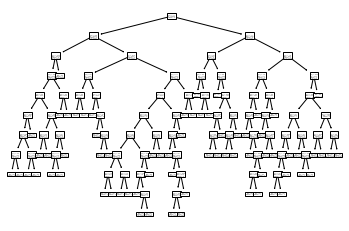

In [ ]:
from sklearn import tree

# BUILDING LE DECISION TREE WILL START LE NOW!!!

# Create da decision tree
dec_tree = tree.DecisionTreeRegressor()
print(dec_tree)

# Train da decision tree on de training data (X, Y)
dec_tree = dec_tree.fit(X, Y)
print(dec_tree)

# Plot da picture of le decision tree
tree.plot_tree(dec_tree)

**DA KNN (K-Nearest Neighbor)**

In [ ]:
# Now we'll see an example of how to automatically train a KNN example

from sklearn import neighbors

# number of neighbors
n_neighbors = 15

# Create a K-Nearest Neighbors Model
knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)

# Train the model
knn.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

**DA Linear Regression**

In [ ]:
import keras
from tensorflow.keras import layers

# Define a variable INPUT_SIZE which is equal to the number of
# features
INPUT_SIZE = 9

# Define a variable OUTPUT_SIZE which is equal to the number of
# targets
OUTPUT_SIZE = 1

# Here we will define our model (a1, ...., a11, b)
lin_model = keras.Sequential([
    layers.Dense(OUTPUT_SIZE, input_shape=[INPUT_SIZE]),
])

# Define the loss function to use, and optimizer (method to perform
# gradient descent - see notebook 4 for more info)
lin_model.compile(loss='mean_squared_error', optimizer='adam') 

# Finally we will train the model with the X, Y data
lin_model.fit(X, Y, epochs=1000, batch_size=5)

Epoch 1/1000
14/14 [==============================] - 0s 1ms/step - loss: 15673.9639
Epoch 2/1000
14/14 [==============================] - 0s 1ms/step - loss: 14297.6621
Epoch 3/1000
14/14 [==============================] - 0s 1ms/step - loss: 13021.9092
Epoch 4/1000
14/14 [==============================] - 0s 996us/step - loss: 11828.7061
Epoch 5/1000
14/14 [==============================] - 0s 1ms/step - loss: 10723.1719
Epoch 6/1000
14/14 [==============================] - 0s 1ms/step - loss: 9702.1650
Epoch 7/1000
14/14 [==============================] - 0s 1ms/step - loss: 8765.9385
Epoch 8/1000
14/14 [==============================] - 0s 1ms/step - loss: 7901.7046
Epoch 9/1000
14/14 [==============================] - 0s 1ms/step - loss: 7121.2856
Epoch 10/1000
14/14 [==============================] - 0s 1ms/step - loss: 6380.0591
Epoch 11/1000
14/14 [==============================] - 0s 1ms/step - loss: 5718.7554
Epoch 12/1000
14/14 [==============================] - 0s 1ms/step 

**DA Neural Network (NN)**



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create Model
model = Sequential()

# Add Input Layer with relu activation
model.add(Dense(8, input_dim=9, activation='relu'))

# Add Hidden Layer with relu activation
model.add(Dense(4, activation='relu'))

# Add Output Layer with sigmoid activation
model.add(Dense(1))

# Assign model loss function
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, Y, epochs=1000, batch_size=10)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 1788.9897
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 1545.8035
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 1338.8448
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 1151.8870
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 981.5172
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 851.7461
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 744.1458
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 669.5438
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 620.4038
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 594.2701
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 575.0889
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 562.2350
Epoch 13/1000
7/7 [==

In [ ]:
# Try to get a mean squared error value for decision trees and KNN,
# which algorithm performed the best?
from sklearn.metrics import mean_squared_error

print("Neural Network")
print(mean_squared_error(model.predict(X_test), Y_test))
print("Linear Regression")
print(mean_squared_error(lin_model.predict(X_test), Y_test))
print("Decision Trees")
print(mean_squared_error(dec_tree.predict(X_test), Y_test))
print("KNN")
print(mean_squared_error(knn.predict(X_test), Y_test))

Neural Network
131.25376149101658
Linear Regression
66.25380055696044
Decision Trees
20.650408019231747
KNN
76.73856860037557


**Da Extra Stuffs for this MODEL**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d1a04f60>]],
      dtype=object)

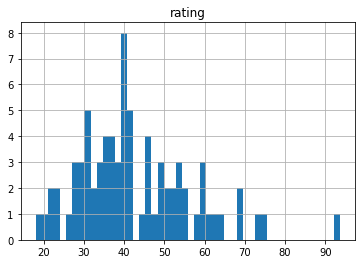

In [ ]:
# Histogram
df.hist(column="rating", bins=50)

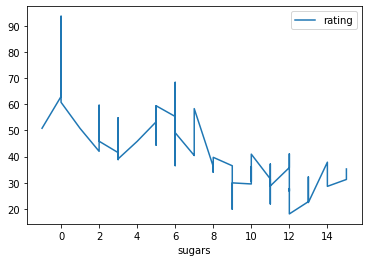

In [ ]:
# This proves that sugars affects the rating of the cereal
data = df.sort_values(by=['sugars'])
data.plot.line(x='sugars', y='rating')

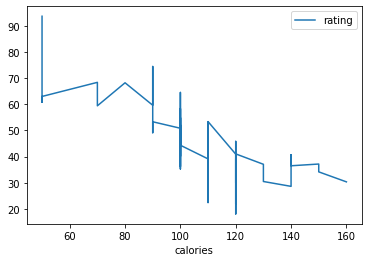

In [ ]:
# This proves that sugars affects the rating of the cereal
data = df.sort_values(by=['calories'])
data.plot.line(x='calories', y='rating')